In [29]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [30]:
rain_range = np.arange(0, 101, 1)
wind_range = np.arange(0, 101, 1)

In [31]:
rain_slight = fuzz.trimf(rain_range, [0, 0, 40])
rain_heavy = fuzz.trimf(rain_range, [30, 60, 100])

In [32]:
wind_weak = fuzz.trimf(wind_range, [0, 0, 50])
wind_strong = fuzz.trimf(wind_range, [40, 80, 100])

In [33]:
decision_open = fuzz.trimf(rain_range, [0, 0, 50])
decision_close = fuzz.trimf(rain_range, [30, 60, 100])
decision_undecided = fuzz.trimf(rain_range, [40, 60, 80])

In [34]:
rule1 = fuzz.interp_membership(rain_range, rain_slight, 20) * fuzz.interp_membership(wind_range, wind_weak, 30)
rule2 = fuzz.interp_membership(rain_range, rain_heavy, 70) + fuzz.interp_membership(wind_range, wind_strong, 90)

In [35]:
decision_opened = np.fmax(rule1, decision_open)
decision_closed = np.fmax(rule2, decision_close)
decision_combined = np.fmax(decision_opened, decision_closed)

In [36]:
final_decision = fuzz.defuzz(rain_range, decision_combined, 'centroid')

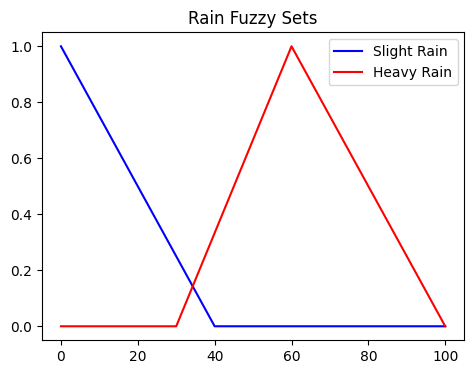

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rain_range, rain_slight, label='Slight Rain', color='blue')
plt.plot(rain_range, rain_heavy, label='Heavy Rain', color='red')
plt.title('Rain Fuzzy Sets')
plt.legend()

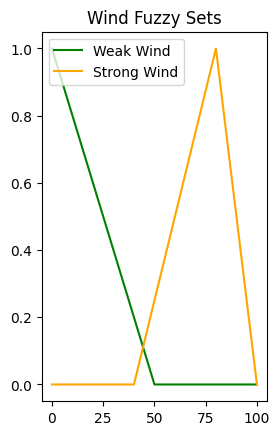

In [38]:
plt.subplot(1, 2, 2)
plt.plot(wind_range, wind_weak, label='Weak Wind', color='green')
plt.plot(wind_range, wind_strong, label='Strong Wind', color='orange')
plt.title('Wind Fuzzy Sets')
plt.legend()

In [39]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

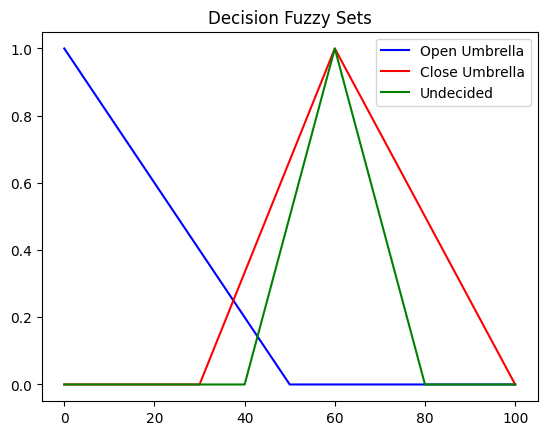

In [40]:
plt.plot(rain_range, decision_open, label='Open Umbrella', color='blue')
plt.plot(rain_range, decision_close, label='Close Umbrella', color='red')
plt.plot(rain_range, decision_undecided, label='Undecided', color='green')
plt.title('Decision Fuzzy Sets')
plt.legend()

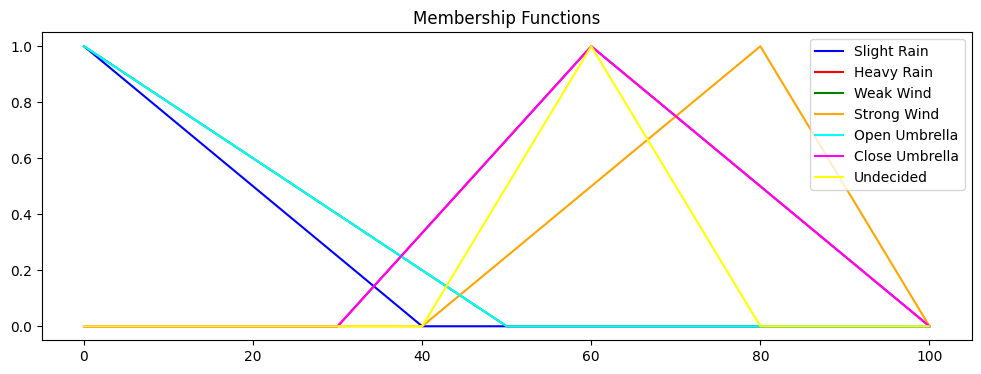

In [41]:
plt.figure(figsize=(12, 4))
plt.plot(rain_range, rain_slight, label='Slight Rain', color='blue')
plt.plot(rain_range, rain_heavy, label='Heavy Rain', color='red')
plt.plot(wind_range, wind_weak, label='Weak Wind', color='green')
plt.plot(wind_range, wind_strong, label='Strong Wind', color='orange')
plt.plot(rain_range, decision_open, label='Open Umbrella', color='cyan')
plt.plot(rain_range, decision_close, label='Close Umbrella', color='magenta')
plt.plot(rain_range, decision_undecided, label='Undecided', color='yellow')
plt.title('Membership Functions')
plt.legend()
plt.show()

In [42]:
if final_decision <= 40:
    print("Open Umbrella")
elif final_decision >= 60:
    print("Close Umbrella")
else:
    print("Undecided (Use Your Judgment)")

Undecided (Use Your Judgment)
